# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:https://www.kaggle.com/uciml/mushroom-classification

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [130]:
# import libraries
# dataset source is linked above 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Created a dataframe using pd for the mushrooms, which is a single csv file/dataframe.
cleaned_shrooms = pd.read_csv("mushrooms.csv")
cleaned_shrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

In [47]:
# info to refamiliarize myself with the columns and find correlations. 
# Class, habitat, odor, cap color, and population have been heavily 
# used so far in my Tableau project. 
shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [48]:
# describe to see how many unique strings there are in the dataset
shrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


C:\Users\tminu\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


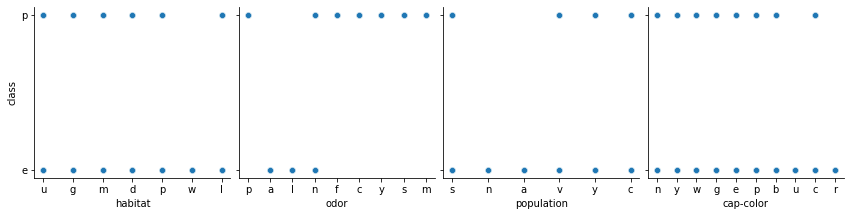

In [87]:
# graph a pairplot to look for correlations with class as Y.
sb.pairplot(shrooms, x_vars=['habitat','odor','population','cap-color'],
            y_vars='class', size=3, aspect=1, kind='scatter')
plt.show()

C:\Users\tminu\anaconda3\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\tminu\anaconda3\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

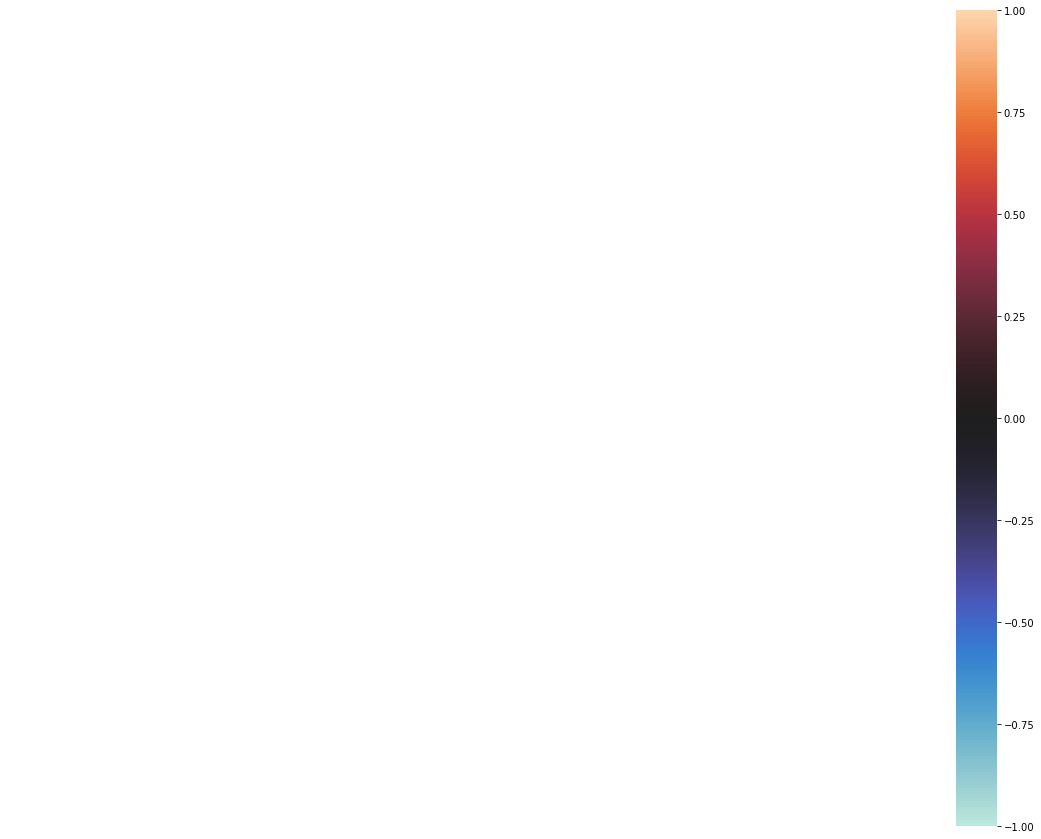

In [50]:
# Heatmap attempt #1 - ValueError: zero-size array to reduction operation fmin which has no identity
# shrooms_Corr = shrooms.corr()
# sb.heatmap(shrooms_Corr, xticklabels=shrooms_Corr.columns, yticklabels=shrooms_Corr.columns, annot=True)

# Heatmap attempt #2 - This runs but does not provide a very satisfying result.
# I need to turn my strings into booleans.
corr = shrooms.corr()
plt.subplots(figsize=(20,15))
sb.heatmap(corr,  annot = True, vmin=-1, vmax=1, center= 0)

In [76]:
# shape to see how many rows and columns (string types) there are in the data set. 
cleaned_shrooms.shape

(8124, 23)

In [52]:
# head to see the first 5 rows. 
cleaned_shrooms.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
# converting into dummy indicator variables. 
# This turns the strings into booleans for better modeling.
# creates dummy variables since my dataset is only strings.
find_dummies = pd.get_dummies(cleaned_shrooms)
find_dummies

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [73]:
# check to see columns in data type
find_dummies.dtypes

class_e        uint8
class_p        uint8
cap-shape_b    uint8
cap-shape_c    uint8
cap-shape_f    uint8
               ...  
habitat_l      uint8
habitat_m      uint8
habitat_p      uint8
habitat_u      uint8
habitat_w      uint8
Length: 119, dtype: object

In [92]:
#look for missing values
find_dummies.isna().sum()

class_e        0
class_p        0
cap-shape_b    0
cap-shape_c    0
cap-shape_f    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 119, dtype: int64

In [93]:
#look for missing values
cleaned_shrooms.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [94]:
# save the cleaned data set
# cleaned_shrooms.to_excel('cleaned_mushrooms.xlsx', index=False)

In [117]:
# check correlations with corr.
# cleaned_shrooms.corr()
# cleaned_shrooms

# corr showing boolean values 
# note that some column names have changed
find_dummies.corr()
find_dummies

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [125]:
# correlations for columns as numbers from the class_p column
pd.DataFrame(find_dummies.corr()['class_p'].sort_values())

,class_p
class_e,-1.000000
odor_n,-0.785557
ring-type_p,-0.540469
gill-size_b,-0.540024
bruises_t,-0.501530
...,...
stalk-surface-below-ring_k,0.573524
stalk-surface-above-ring_k,0.587658
odor_f,0.623842
class_p,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

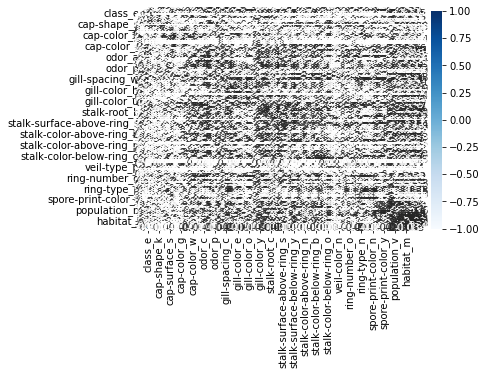

In [131]:
# plotting the find_dummies variable on a heatmap
# population and habitat seem to be correlated, so I will do this for the model
sb.heatmap(find_dummies.corr(), cmap="Blues", annot = True)
plt.show

In [121]:
# correlations for columns as numbers from the class_e column
pd.DataFrame(find_dummies.corr()['class_e'].sort_values())

,class_e
class_p,-1.000000
odor_f,-0.623842
stalk-surface-above-ring_k,-0.587658
stalk-surface-below-ring_k,-0.573524
gill-size_n,-0.540024
...,...
gill-size_b,0.540024
ring-type_p,0.540469
odor_n,0.785557
class_e,1.000000


In [135]:
# correlations for columns as numbers from the habitat column
# specifically for meadows
pd.DataFrame(find_dummies.corr()['habitat_m'].sort_values())

,habitat_m
bruises_f,-0.228986
stalk-shape_t,-0.221048
habitat_d,-0.153579
population_v,-0.144434
ring-type_e,-0.139113
...,...
population_n,0.347262
cap-shape_b,0.374316
stalk-root_c,0.618095
habitat_m,1.000000


In [134]:
# alternatively, I could model population_v, which is 'several'
pd.DataFrame(find_dummies.corr()['population_v'].sort_values())

,population_v
population_y,-0.513929
gill-size_b,-0.506475
class_e,-0.443722
population_s,-0.423728
habitat_g,-0.379699
...,...
class_p,0.443722
gill-size_n,0.506475
gill-color_b,0.522601
population_v,1.000000


## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [132]:
# assign x and y - habitat_m and population_v have high correlation
x = shrooms['habitat_m']
y = shrooms['population_v']

In [137]:
# create train and test sets
from sklearn.model_selection import train_test_split

# Split X and Y sets into 80% training data and 20% testing data:
X_train = find_dummies['habitat_m']
Y_train = find_dummies['population_v']
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2)

In [138]:
X_train

2398    0
4525    0
4306    0
4166    0
4164    0
       ..
913     0
337     0
3542    0
7695    0
1865    0
Name: habitat_m, Length: 6499, dtype: uint8

In [139]:
Y_train

2398    0
4525    0
4306    0
4166    1
4164    1
       ..
913     0
337     0
3542    1
7695    1
1865    0
Name: population_v, Length: 6499, dtype: uint8

In [150]:
# building the model. Remember to import any libraries you may need
import statsmodels.api as sm

# adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,habitat_m
2398,1.0,0
4525,1.0,0
4306,1.0,0
4166,1.0,0
4164,1.0,0
...,...,...
913,1.0,0
337,1.0,0
3542,1.0,0
7695,1.0,0


In [152]:
# fitting the regression line
lr = sm.OLS(Y_train, X_train_sn).fit()

# print
lr.params

const        0.511498
habitat_m   -0.393354
dtype: float64

In [153]:
# summary list of parameters of the regression 
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           population_v   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           6.36e-33
Time:                        15:04:52   Log-Likelihood:                -4645.4
No. Observations:                6499   AIC:                             9295.
Df Residuals:                    6497   BIC:                             9308.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5115      0.006     81.836      0.000       0.499       0.524
habitat_m     -0.3934      0.033    -12.018      0.000      -0.458      -0.329
==============================================================================
Omnibus:                    23174.686   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.458
Skew:                          -0.022   Prob(JB):                    4.71e-224
Kurtosis:                       1.052   Cond. No.                         5.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# constant
X_test_sm = sm.add_constant(X_test)

# predicting y value
Y_test_pred = lr.predict(X_test_sm)

# printing 15 predicted values
Y_test_pred

487     0.511498
129     0.118143
5841    0.511498
6646    0.511498
7929    0.511498
          ...   
3962    0.511498
3526    0.511498
1348    0.511498
7772    0.511498
4656    0.511498
Length: 1625, dtype: float64

In [155]:
# importing r2_square
from sklearn.metrics import r2_score

# checking the R-squared value
r_squared = r2_score(Y_test, Y_test_pred)
r_squared

0.0172937355059124

## Error Terms

Finally, plot your error terms!

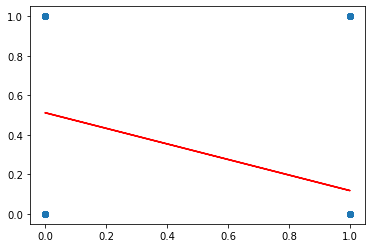

In [157]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test_pred, 'r')
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

What was your R-squared value?

Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?

Was your plot of the error terms a bell curve? 